# Plotting With Style

You may have noticed that the default way `matplotlib` formats the plot elements leaves a bit to be desired.
The fonts are rather small for one thing. The default color scheme has been improved of late, but you may not like the default order. The tick marks are rediculously tiny, etc, etc.

In this notebook, we'll go over some of the changes you might want to make to your plots to make them look a bit more
stylish. This, of course, is a matter of taste, so we will finish off with how to make your own personal plot style file (or multiple versions!) and keep all the formatting out of your scripts. A good reference for working with styles can be found in the [matplotlib documentation](https://matplotlib.org/3.5.0/tutorials/introductory/customizing.html).

Let's start with a basic plot containing several elements we've seen before so that we can play around with them. We make it a function so that we can run it over and over again.

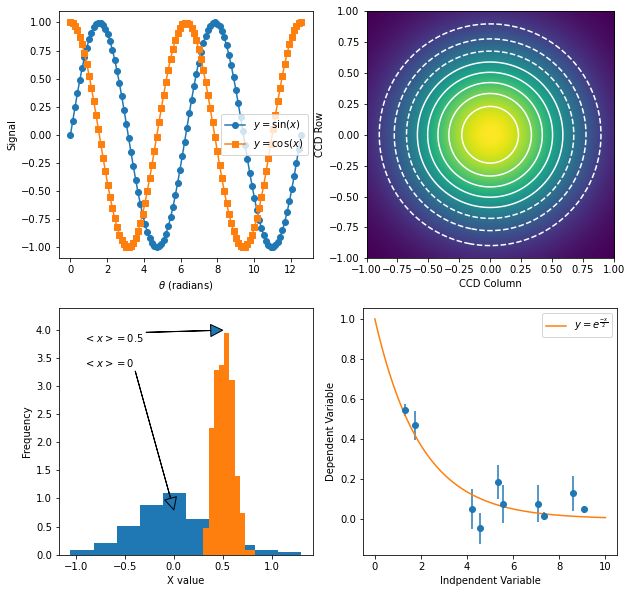

In [1]:
from matplotlib import pyplot as plt
import numpy as np

def make_plot():
    
    fig,axes = plt.subplots(2,2, figsize=(10,10))
    x1 = np.linspace(0,4*np.pi, 100)
    axes[0,0].plot(x1, np.sin(x1), '-o', label='$y = \sin(x)$')
    axes[0,0].plot(x1, np.cos(x1), '-s', label='$y = \cos(x)$')
    axes[0,0].legend()
    axes[0,0].set_xlabel(r'$\theta$ (radians)')
    axes[0,0].set_ylabel('Signal')
    
    x2 = np.random.normal(0, 0.5, size=100)
    x3 = np.random.normal(0.5, 0.1, size=200)
    axes[1,0].hist(x2, density=True)
    axes[1,0].hist(x3, density=True)
    ypeak = 1.0/np.sqrt(2*np.pi)/0.5
    axes[1,0].annotate('$<x> = 0$', xy=(0,ypeak), xytext=(0.1,0.8),
                      textcoords=axes[1,0].transAxes, va='top', ha='left',
                      arrowprops={'width':0.1})
    ypeak = 1.0/np.sqrt(2*np.pi)/0.1
    axes[1,0].annotate('$<x> = 0.5$', xy=(0.5,ypeak), xytext=(0.1,0.9),
                      textcoords=axes[1,0].transAxes, va='top', ha='left',
                      arrowprops={"width":0.1})
    axes[1,0].set_xlabel('X value')
    axes[1,0].set_ylabel('Frequency')
    # Need to make sure the peak is included in the graph, otherwise sometimes the
    #  annotation gets left out
    axes[1,0].set_ylim(0, ypeak*1.1)
    
    x,y = np.meshgrid(np.linspace(-1,1,100),np.linspace(-1,1,100))
    Z = np.exp(-0.5*(x**2 + y**2)/0.25)
    axes[0,1].imshow(Z, extent=(x.min(), x.max(), y.min(), y.max()))
    axes[0,1].contour(x, y, Z-0.5, levels=[-0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4],
                     zorder=10, colors=['white'])
    axes[0,1].set_xlabel('CCD Column')
    axes[0,1].set_ylabel('CCD Row')
    
    x4 = np.random.uniform(0,10,size=10)
    yerr = np.random.uniform(0.01, 0.1, size=10)
    y4 = np.exp(-x4/2) + np.random.normal(0, yerr)
    axes[1,1].errorbar(x4, y4, yerr=yerr, fmt='o')
    x5 = np.linspace(0,10,100)
    axes[1,1].plot(x5, np.exp(-x5/2), label=r"$y = e^{\frac{-x}{2}}$")
    axes[1,1].legend()
    axes[1,1].set_xlabel('Indpendent Variable')
    axes[1,1].set_ylabel('Dependent Variable')
   
make_plot()    

## Font sizes and Family

While the plots look not too bad, this isn't necessarily how you would want them to appear in a journal. The first thing is the label sizes:  the default is much much too small. Journals will tend to shrink your graphs. Also keep in mind that when you give a talk, the graph will be viewed at a distance, so it will make these labels (and even different symbols) hard to distinguish. I also personally prefer *serif* fonts. Let's fix these first.

I'm going to use the older `matplotlib.rcParams` dictionary to update the style, as this makes it easy to see how it relates to the stylesheet later on. But you can also use the `matplotlib.rc()` function, which has a number of advantages.

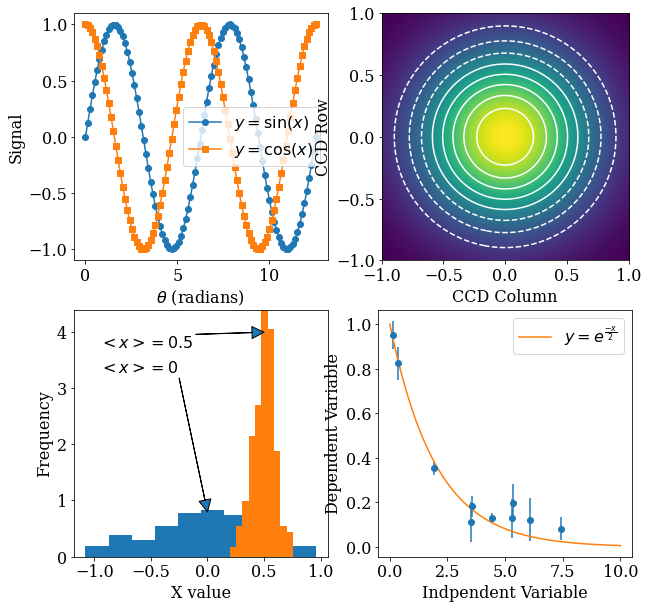

In [2]:
from matplotlib import rcParams
rcParams['font.size'] = 16
rcParams['font.family'] = 'serif'
fig = make_plot()

Not bad. But notice that the y-axis labels are now overlapping the left-hand panels. We need to increase the inter-plot spacing. We *could* do this with a call to `plt.sublots_adjust` and specify the various margins. We could also call `fit.tight_layout()`, which would do it automatically. Or, we could ask `matplotlib` to always do it automatically by modifying the `rc` settings:

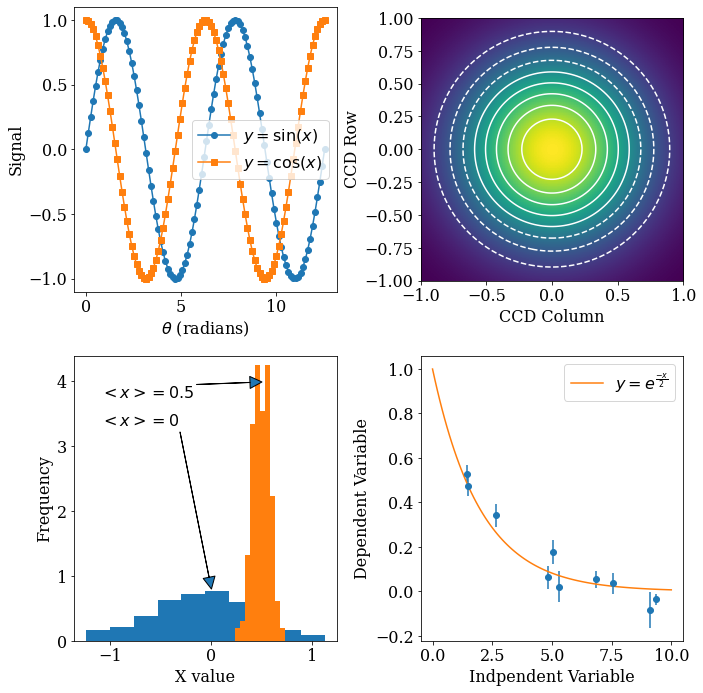

In [3]:
rcParams['figure.autolayout'] = True
fig = make_plot()

## Ticks, minor ticks, and grid lines

The default tick marks are *definitely* way too small. Some of us like minor ticks, which are off by default. I also like having the ticks on top and to the right, and have them pointing in rather than out. Personally, I don't like coordinate grids unless they serve a purpose (e.g., coordinates on the sky), but they can be turned on by default.

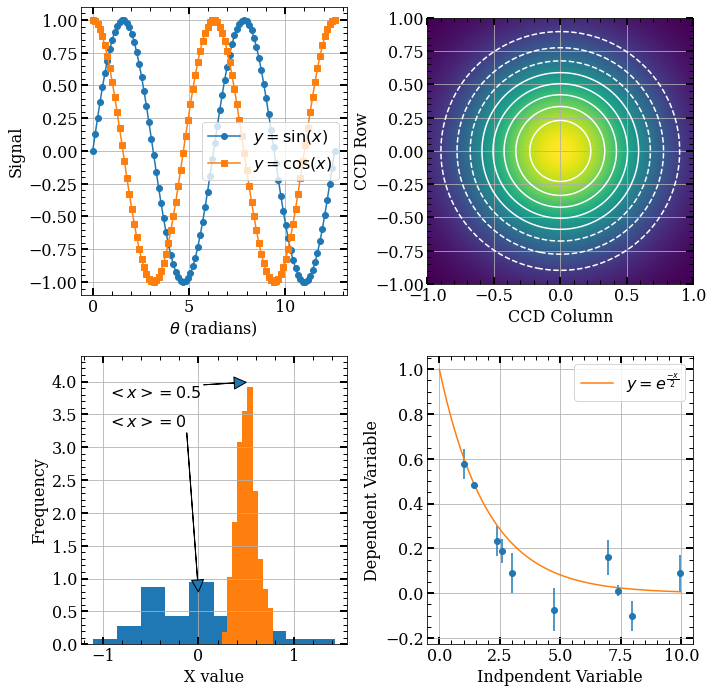

In [4]:
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
# Using the matplotlib.rc() function can make all this much shorter
rcParams['xtick.direction'] = 'in'
rcParams['xtick.major.size'] = 7
rcParams['xtick.major.width'] = 2
rcParams['xtick.minor.visible'] = True
rcParams['xtick.minor.size'] = 4
rcParams['xtick.minor.width'] = 1
rcParams['ytick.direction'] = 'in'
rcParams['ytick.major.size'] = 7
rcParams['ytick.major.width'] = 2
rcParams['ytick.minor.visible'] = True
rcParams['ytick.minor.size'] = 4
rcParams['ytick.minor.width'] = 1

# Turn on grids
rcParams['axes.grid'] = True

fig = make_plot()

## Use LaTeX for equations

Better! But notice that while my axis labels are all serif fonts, the equations are not. And they're not that great to look at either. That's because `matplotlib` defaults to a light-weight equation formatter called `mathtext`. But for publication-quality graphs, you probably want to use the more powerful and versatile LaTeX equations. But this requires having LaTeX installed on your computer.

/Library/TeX/texbin/latex


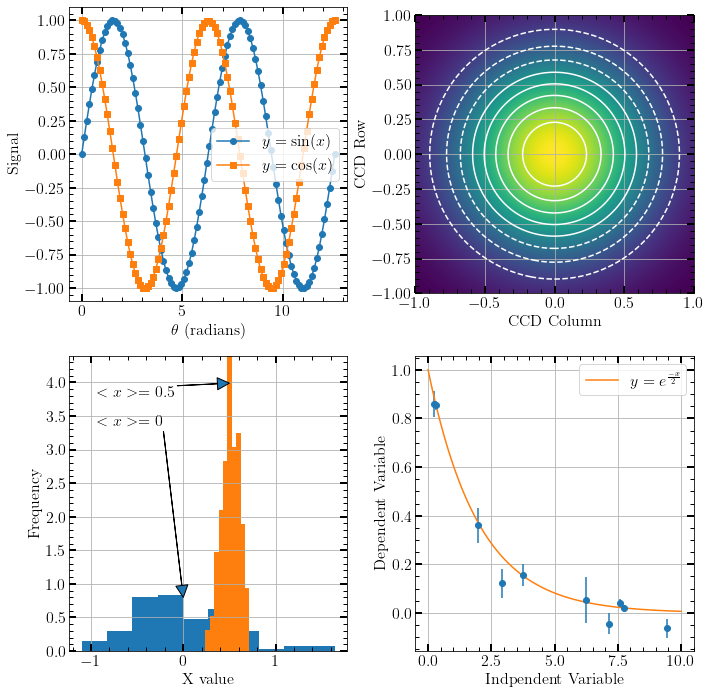

In [5]:
# Check to see if we have LaTeX installed:
import os
res = os.system('which latex')
# res = 0 if success
if res == 0:
    rcParams['text.usetex'] = True
    #rc('font', serif=['Palatino'])
    fig = make_plot()
else:
    print("Sorry, no LaTeX command found. Keeping mathtext")

## Style Sheets

If you look back at all those `rcParams` commands, it's quite a bit of typing that needs to be done. But to save time and develop your own personal style, you can put all that into a *style sheet* and load it with one single commmand: `plt.style.use()`. For convenience, we've included a sample that implements all the things we did here. But first, let's go back to the default style. Note that for some reason, each use of `plt.style.use()` makes the plots bigger and bigger in notebooks. 

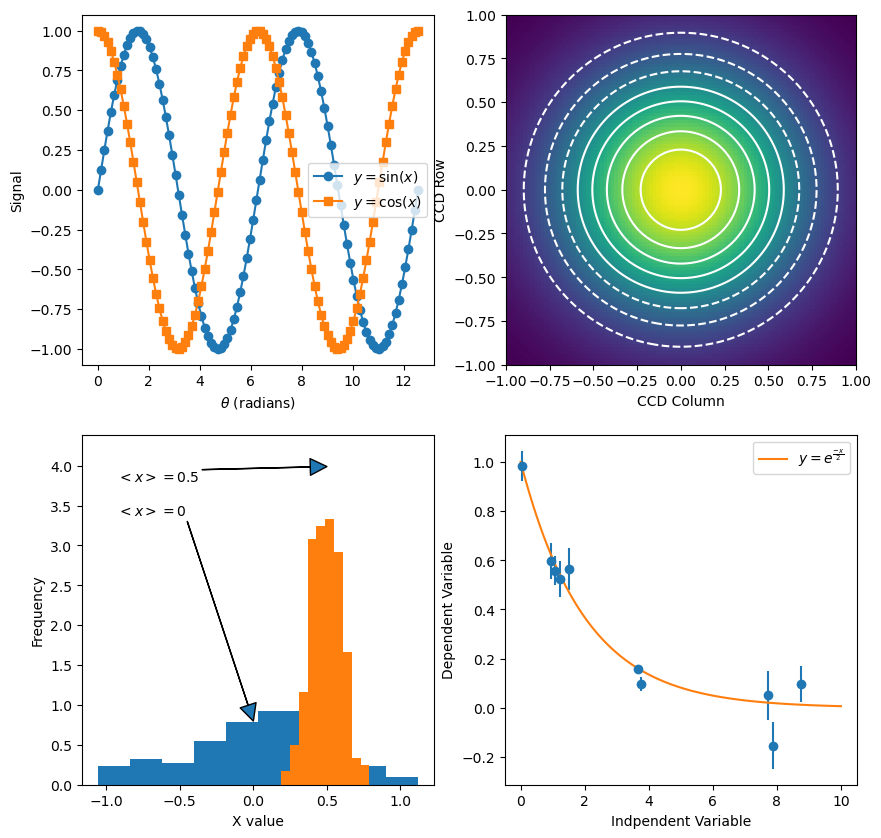

In [6]:
plt.style.use('default')
make_plot()

The style sheet we created is pretty simple to understand if you go back and look at the `rcParams` statements we ran. Here's the content of `mystyle.sty`:

    font.size: 16
    font.family: serif
    figure.autolayout: True
    xtick.top: True
    ytick.right: True

    xtick.direction: in
    xtick.major.size: 7
    xtick.major.width: 2
    xtick.minor.visible: True
    xtick.minor.size: 4
    xtick.minor.width: 1
    ytick.direction: in
    ytick.major.size: 7
    ytick.major.width: 2
    ytick.minor.visible:  True
    ytick.minor.size: 4
    ytick.minor.width: 1
    # Note: this could break your code if you don't have LaTeX
    text.usetex: True

    # Turn on grids
    axes.grid: True
    
Just as with the default, we can load this up and replot:

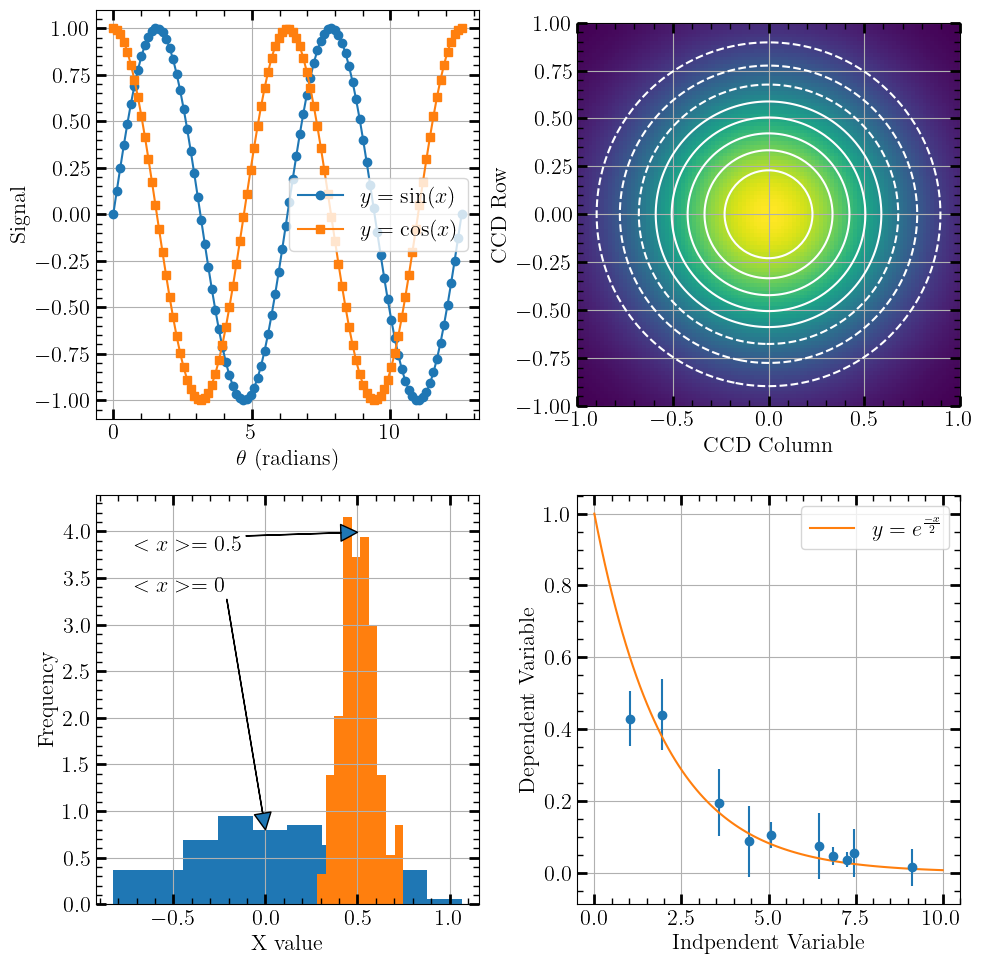

In [7]:
plt.style.use('./mystyle.sty')
make_plot()

## Some buit-in defaults

Matplotlib has some other styles you can try and maybe even customize for yourself. The next command shows the available styles which you can try one after the other. There is also a command to tell you where the style files are located in case you want to copy and customize them.

In [8]:
print("Available Styles:")
[print("   "+style) for style in plt.style.available]

# This is where the style files are located
import matplotlib
print('\n'+'Style folder:')
print(os.path.dirname(matplotlib.matplotlib_fname())+"/stylelib")

Available Styles:
   Solarize_Light2
   _classic_test_patch
   _mpl-gallery
   _mpl-gallery-nogrid
   bmh
   classic
   dark_background
   fast
   fivethirtyeight
   ggplot
   grayscale
   seaborn
   seaborn-bright
   seaborn-colorblind
   seaborn-dark
   seaborn-dark-palette
   seaborn-darkgrid
   seaborn-deep
   seaborn-muted
   seaborn-notebook
   seaborn-paper
   seaborn-pastel
   seaborn-poster
   seaborn-talk
   seaborn-ticks
   seaborn-white
   seaborn-whitegrid
   serif
   tableau-colorblind10

Style folder:
/Users/cburns/anaconda3/envs/boot/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib


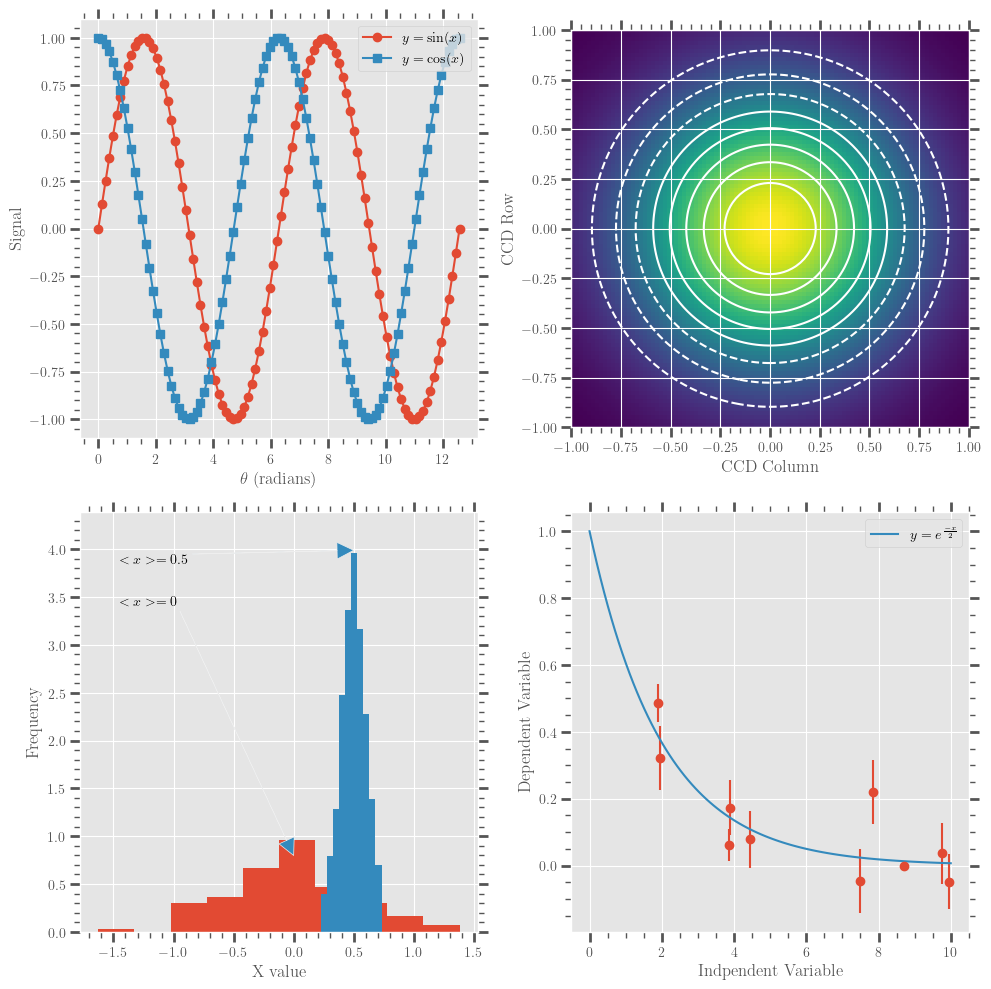

In [9]:
# Try them out and see which you prefer!
plt.style.use('ggplot')
make_plot()